In [2]:
import numpy as np
from astropy.io import fits
from astropy.io import ascii
import matplotlib.pyplot as plt
import scipy as sc
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from sklearn import mixture
#from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import matplotlib.mlab as mlab
from cycler import cycler
%matplotlib inline

/Users/lchevalier/Downloads/Ureka/variants/common/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
%cd /Users/lchevalier/Dropbox/Project1_N4526/sextractor

/Users/lchevalier/Dropbox/Project1_N4526/sextractor


In [4]:
#filename='25_08_16_g_i.fits'
filename='N1052_inner.fits'

hdulist=fits.open(filename)

N4526=hdulist[1].data

cols=hdulist[1].columns
Imag='MAG_BEST_2'
Gmag='MAG_BEST_1'

print cols


u_g=1.28*((N4526[Gmag])-(N4526[Imag]))+1.14
u=(N4526[Gmag])+0.8116*(u_g)+0.1313
g= u-u_g

ColDefs(
    name = 'MAG_AUTO_1'; format = 'E'; unit = 'mag'
    name = 'MAGERR_AUTO_1'; format = 'E'; unit = 'mag'
    name = 'MAG_BEST_1'; format = 'E'; unit = 'mag'
    name = 'MAGERR_BEST_1'; format = 'E'; unit = 'mag'
    name = 'ALPHA_J2000_1'; format = 'D'; unit = 'deg'
    name = 'DELTA_J2000_1'; format = 'D'; unit = 'deg'
    name = 'ELONGATION_1'; format = 'E'
    name = 'ELLIPTICITY_1'; format = 'E'
    name = 'FWHM_IMAGE_1'; format = 'E'; unit = 'pixel'
    name = 'FWHM_WORLD_1'; format = 'E'; unit = 'deg'
    name = 'CLASS_STAR_1'; format = 'E'
    name = 'MAG_AUTO_2'; format = 'E'; unit = 'mag'
    name = 'MAGERR_AUTO_2'; format = 'E'; unit = 'mag'
    name = 'MAG_BEST_2'; format = 'E'; unit = 'mag'
    name = 'MAGERR_BEST_2'; format = 'E'; unit = 'mag'
    name = 'ALPHA_J2000_2'; format = 'D'; unit = 'deg'
    name = 'DELTA_J2000_2'; format = 'D'; unit = 'deg'
    name = 'ELONGATION_2'; format = 'E'
    name = 'ELLIPTICITY_2'; format = 'E'
    name = 'FWHM_IMAGE_2'; form

In [5]:
DRA=40.2699937-N4526['ALPHA_J2000_1']
DDEC=-8.2557642-N4526['DELTA_J2000_1']

selection_comp =(abs(DDEC)<=0.02)&(abs(DRA)<=0.02)

In [6]:
print len(N4526[selection_comp])
print N4526[Gmag][0]

68
18.4252


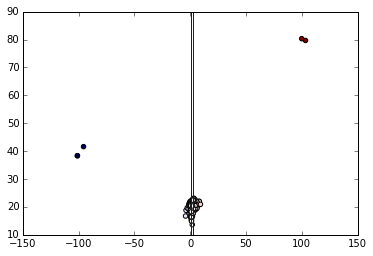

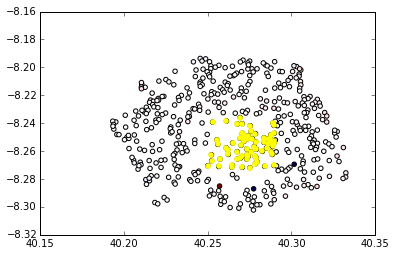

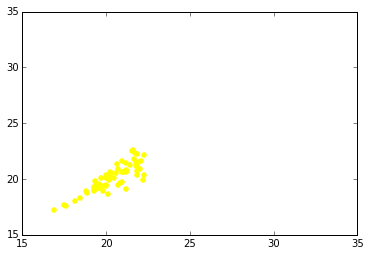

In [7]:
plt.figure()
plt.scatter(u_g,g, c=u_g ,cmap='seismic')
plt.axvline(0.8)
plt.axvline(2.5)
#plt.scatter(u_g[selection_comp],g[selection_comp], color='yellow')

plt.figure()
plt.scatter(N4526['ALPHA_J2000_1'],N4526['DELTA_J2000_1'], c=u_g, cmap='seismic')
plt.scatter(N4526['ALPHA_J2000_1'][selection_comp],N4526['DELTA_J2000_1'][selection_comp], color='yellow')

plt.figure()
plt.scatter(g[selection_comp],N4526[Imag][selection_comp], color='yellow')
plt.xlim(15,35)
plt.ylim(15,35)
plt.show()

In [8]:
for i in np.arange(0,188,1):
    print 'GC_new'+str(i+1)#,N4526['ALPHA_J2000_1'][selection_comp][i],N4526['DELTA_J2000_1'][selection_comp][i], 2000, g[selection_comp][i],'g',1000-g[selection_comp][i]**1.5,1,0,70.00

GC_new1
GC_new2
GC_new3
GC_new4
GC_new5
GC_new6
GC_new7
GC_new8
GC_new9
GC_new10
GC_new11
GC_new12
GC_new13
GC_new14
GC_new15
GC_new16
GC_new17
GC_new18
GC_new19
GC_new20
GC_new21
GC_new22
GC_new23
GC_new24
GC_new25
GC_new26
GC_new27
GC_new28
GC_new29
GC_new30
GC_new31
GC_new32
GC_new33
GC_new34
GC_new35
GC_new36
GC_new37
GC_new38
GC_new39
GC_new40
GC_new41
GC_new42
GC_new43
GC_new44
GC_new45
GC_new46
GC_new47
GC_new48
GC_new49
GC_new50
GC_new51
GC_new52
GC_new53
GC_new54
GC_new55
GC_new56
GC_new57
GC_new58
GC_new59
GC_new60
GC_new61
GC_new62
GC_new63
GC_new64
GC_new65
GC_new66
GC_new67
GC_new68
GC_new69
GC_new70
GC_new71
GC_new72
GC_new73
GC_new74
GC_new75
GC_new76
GC_new77
GC_new78
GC_new79
GC_new80
GC_new81
GC_new82
GC_new83
GC_new84
GC_new85
GC_new86
GC_new87
GC_new88
GC_new89
GC_new90
GC_new91
GC_new92
GC_new93
GC_new94
GC_new95
GC_new96
GC_new97
GC_new98
GC_new99
GC_new100
GC_new101
GC_new102
GC_new103
GC_new104
GC_new105
GC_new106
GC_new107
GC_new108
GC_new109
GC_new110
GC_new11

In [24]:
image=[]
for i in np.arange(1,21,1):
    print 'sex r_comp'+str(i)+'.fit' , '-c NGC4526_r.sex', '-CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out'+str(i)+'.fits \n'

sex r_comp1.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out1.fits 

sex r_comp2.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out2.fits 

sex r_comp3.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out3.fits 

sex r_comp4.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out4.fits 

sex r_comp5.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out5.fits 

sex r_comp6.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out6.fits 

sex r_comp7.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out7.fits 

sex r_comp8.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out8.fits 

sex r_comp9.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out9.fits 

sex r_comp10.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out10.fits 

sex r_comp11.fit -c NGC4526_r.sex -CATALOG_TYPE ASCII -CATALOG_NAME r_comp_out11.fits 

sex r_comp12.fit -c NGC4526_r.sex -CATALOG_TYPE AS

In [78]:
#filename_comp='comp_test_full.fits'
#filename_full='comp_complete_objects.fits'

filename_comp='full_recovered.fits'
filename_full='starlist_full.fits'
#filename='CFST_match_18_08_16.fits'
hdulist_comp=fits.open(filename_comp) #keyword comp for the fake stars recovred
hdulist_full=fits.open(filename_full) #keyword ull for the initial input of fake stars


comp=hdulist_comp[1].data
comp_full= hdulist_full[1].data



In [79]:
band = comp['col1_1']
print len(band[comp['col1_1']=='i'])
print len(band[comp['col1_1']=='r'])

Bins= np.arange(20,28,1)
Bins_G= np.arange(21,28,1)

HST_binned= np.digitize(comp_full['col4'][comp_full['col1']=='i'], Bins)
SSEX_binned= np.digitize(comp['col4_1'][comp['col1_1']=='i'],Bins)



24292
23769


In [87]:
Bins= np.arange(15,26,0.25)


HST_binned= np.digitize(comp_full['col4'][comp_full['col1']=='i'], Bins)
SSEX_binned= np.digitize(comp['col4_1'][comp['col1_1']=='i'],Bins)

HST_G_binned= np.digitize(comp_full['col4'][comp_full['col1']=='g'], Bins)
SSEX_G_binned= np.digitize(comp['col4_1'][comp['col1_1']=='g'],Bins)

HST_R_binned= np.digitize(comp_full['col4'][comp_full['col1']=='r'], Bins)
SSEX_R_binned= np.digitize(comp['col4_1'][comp['col1_1']=='r'],Bins)


HST_B = np.bincount(HST_binned)
SSEX_B = np.bincount(SSEX_binned)



if (len(HST_B)>len(SSEX_B)):
    SSEX_B=np.insert(SSEX_B,len(SSEX_B),0)
    if (len(HST_B)>len(SSEX_B)):
        SSEX_B=np.insert(SSEX_B,len(SSEX_B),0)
else:
    print 'has the right shape'

    
    
    
HST_G_B = np.bincount(HST_G_binned)
SSEX_G_B = np.bincount(SSEX_G_binned)


HST_R_B = np.bincount(HST_R_binned)
SSEX_R_B = np.bincount(SSEX_R_binned)




if (len(HST_G_B)>len(SSEX_G_B)):
    SSEX_G_B=np.insert(SSEX_G_B,len(SSEX_G_B),0)
    if (len(HST_G_B)>len(SSEX_G_B)):
        SSEX_G_B=np.insert(SSEX_G_B,len(SSEX_G_B),0)
else:
    print 'should be the right length \n\n'

if (len(HST_R_B)>len(SSEX_R_B)):
    SSEX_R_B=np.insert(SSEX_R_B,len(SSEX_R_B),0)
    if (len(HST_R_B)>len(SSEX_R_B)):
        SSEX_R_B=np.insert(SSEX_R_B,len(SSEX_R_B),0)
else:
    print 'should be the right length \n\n'




print 'HST objects:',HST_B
print 'I band SUBARU',SSEX_B
print ' \n'
print 'HST objects:',HST_G_B
print 'G band SUBARU',SSEX_G_B
print ' \n'
print 'HST objects:',HST_R_B
print 'R band SUBARU',SSEX_R_B


print sum(HST_R_B),sum(SSEX_R_B)

has the right shape
should be the right length 


should be the right length 


HST objects: [   0    0    0    0    0  706  703  695  716  633  633  692  684  677  689
  699  667  681  671  678  727  662  665  657  717  694  652  664  685  670
  687  673  675  742  723  717  696  708  662  642  655  688  671  684 3360]
I band SUBARU [  0   0   0   0   0 706 702 694 714 631 632 692 683 677 688 694 662 679
 666 675 726 659 659 652 710 687 649 653 675 660 683 663 651 718 700 682
 656 671 614 579 445 187  38  17  63]
 

HST objects: [   0    0    0    0    0  895  924  931  893  929  916  894  886  917  906
  916  903  897  927  927  895  834  922  888  970  891  896  919  969  962
  864  917  903  950  962  912  928  889  950  871  909  940  876  852 4470]
G band SUBARU [  0   0   0   0   0 895 922 928 893 927 915 891 884 913 904 914 892 889
 920 923 891 827 914 883 963 879 884 908 946 944 852 896 880 915 907 861
 859 823 854 788 787 803 720 488 252]
 

HST objects: [   0    0    0    0 

/Users/lchevalier/Downloads/Ureka/variants/common/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/lchevalier/Downloads/Ureka/variants/common/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/Users/lchevalier/Downloads/Ureka/variants/common/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


[        nan         nan         nan         nan  1.          0.99857752
  0.99856115  0.9972067   0.99684044  0.99842022  1.          0.99853801
  1.          0.99854862  0.99284692  0.99250375  0.99706314  0.99254844
  0.99557522  0.99862448  0.99546828  0.99097744  0.99238965  0.9902371
  0.98991354  0.99539877  0.98343373  0.98540146  0.98507463  0.99417758
  0.98514116  0.96444444  0.96765499  0.96818811  0.9511855   0.94252874
  0.94774011  0.92749245  0.90186916  0.67938931  0.27180233  0.05663189
  0.0248538   0.01875   ]


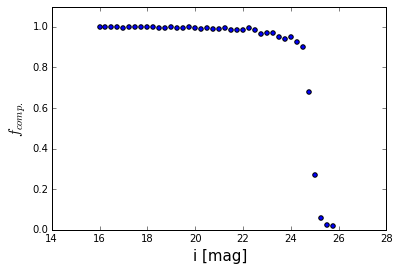

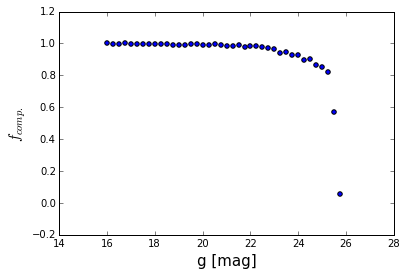

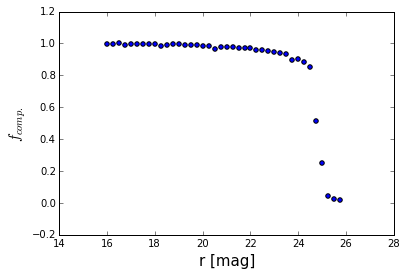

In [88]:
completeness_frac=np.true_divide(SSEX_B,HST_B)
print completeness_frac[1:]

if len(Bins)<len(completeness_frac):
    Bins=np.insert(Bins,0,min(comp['col4_1'][comp['col1_1']=='i']))
    
if len(Bins)>len(completeness_frac):
    completeness_frac=np.insert(completeness_frac,len(completeness_frac),0)
    
completeness_frac_G=np.true_divide(SSEX_G_B,HST_G_B)

if len(Bins_G)<len(completeness_frac_G):
    Bins_G=np.insert(Bins_G,0,min(comp['col4_1'][comp['col1_1']=='g']))
    
completeness_frac_R=np.true_divide(SSEX_R_B,HST_R_B)

if len(Bins_G)<len(completeness_frac_R):
    Bins_G=np.insert(Bins_G,0,min(comp['col4_1'][comp['col1_1']=='r']))
    
    
    
    
P_points = np.arange(15,27,0.005)

    
plt.figure()

plt.scatter(Bins[1:], completeness_frac[1:])
plt.xlabel('i [mag]', size=15)
plt.ylabel('$f_{comp.}$', size=15)
plt.ylim(0,1.1)

#plt.plot(P_points, Pritchet_f(P_points,25,2)-0.1)
plt.savefig(filename_comp[:-5]+'_Mag_completeness_I.png')


plt.figure()

plt.scatter(Bins, completeness_frac_G)
plt.xlabel('g [mag]', size=15)
plt.ylabel('$f_{comp.}$', size=15)

#plt.plot(P_points, Pritchet_f(P_points,25.5,5)-0.1)
plt.savefig(filename_comp[:-5]+'_Mag_completeness_G.png')

#plt.figure()
#plt.hist(completeness_frac)

plt.figure()

plt.scatter(Bins, completeness_frac_R)
plt.xlabel('r [mag]', size=15)
plt.ylabel('$f_{comp.}$', size=15)

#plt.plot(P_points, Pritchet_f(P_points,25,1.8)-0.1)
plt.savefig(filename_comp[:-5]+'_Mag_completeness_R.png')

#plt.figure()
#plt.hist(completeness_frac)
plt.show()



In [107]:
sel1=(comp['col4_1']<=23.5)&(comp['col4_1']>=19)
sel2=(comp_full['col4']<=23.5)&(comp_full['col4']>=19)

D_RA=comp['col2_1'][(comp['col1_1']=='g')]-6288.1837
D_DEC=comp['col3_1'][(comp['col1_1']=='g')]-5775.7879

D_RA_r=comp['col2_1'][(comp['col1_1']=='r')]-6281.2293
D_DEC_r=comp['col3_1'][(comp['col1_1']=='r')]-5743.8101

D_RA_i=comp['col2_1'][(comp['col1_1']=='i')]-6290.1076
D_DEC_i=comp['col3_1'][(comp['col1_1']=='i')]-5785.2218

D_HST_RA_g=comp_full['col2'][(comp_full['col1']=='g')]-6288.1837
D_HST_DEC_g=comp_full['col3'][(comp_full['col1']=='g')]-5775.7879

D_HST_RA_r=comp_full['col2'][(comp_full['col1']=='r')]-6281.2293
D_HST_DEC_r=comp_full['col3'][(comp_full['col1']=='r')]-5743.8101

D_HST_RA_i=comp_full['col2'][(comp_full['col1']=='i')]-6290.1076
D_HST_DEC_i=comp_full['col3'][(comp_full['col1']=='i')]-5785.2218



GDist= ((D_RA**2+D_DEC**2)**0.5)*(0.2)
GDist_r= ((D_RA_r**2+D_DEC_r**2)**0.5)*(0.2)
GDist_i= ((D_RA_i**2+D_DEC_i**2)**0.5)*(0.2)
GDist_HST_g= (((D_HST_RA_g)**2+(D_HST_DEC_g)**2)**0.5)*(0.2)
GDist_HST_r= (((D_HST_RA_r)**2+(D_HST_DEC_r)**2)**0.5)*(0.2)
GDist_HST_i= (((D_HST_RA_i)**2+(D_HST_DEC_i)**2)**0.5)*(0.2)

distances = np.sort(GDist_HST_g)[0::1000]
distances_r = np.sort(GDist_HST_r)[0::1000]
distances_i = np.sort(GDist_HST_i)[0::1000] 

In [108]:
print len(GDist_HST_i), len(GDist_i)

30000 24292


In [109]:
Bins_Dist= np.round(distances)
Bins_Dist_r= np.round(distances_r)
Bins_Dist_i= np.round(distances_i)

HST_DB= np.digitize(GDist_HST_g, Bins_Dist)
SSEX_DB= np.digitize(GDist,Bins_Dist)

HST_Dist = np.bincount(HST_DB)
SSEX_Dist = np.bincount(SSEX_DB)

###############
HST_DB_r= np.digitize(GDist_HST_r, Bins_Dist_r)
SSEX_DB_r= np.digitize(GDist_r,Bins_Dist_r)

HST_Dist_r = np.bincount(HST_DB_r)
SSEX_Dist_r = np.bincount(SSEX_DB_r)

##################
HST_DB_i= np.digitize(GDist_HST_i, Bins_Dist_i)
SSEX_DB_i= np.digitize(GDist_i,Bins_Dist_i)

HST_Dist_i = np.bincount(HST_DB_i)
SSEX_Dist_i = np.bincount(SSEX_DB_i)

################################

In [112]:
print distances
    

[  5.46238208e-01   6.70363047e+01   9.50427652e+01   1.17205937e+02
   1.35035982e+02   1.51725821e+02   1.66082744e+02   1.78485097e+02
   1.90885601e+02   2.02994583e+02   2.14335600e+02   2.24664230e+02
   2.35054498e+02   2.45292885e+02   2.55363051e+02   2.66194972e+02
   2.77104081e+02   2.88909652e+02   3.02356383e+02   3.18113728e+02
   3.36969107e+02   3.68119715e+02   4.28026023e+02   5.25025883e+02
   6.05986149e+02   6.78806809e+02   7.45906546e+02   8.06515066e+02
   8.63539336e+02   9.16541040e+02   9.65770562e+02   1.01220213e+03
   1.05497935e+03   1.09833532e+03   1.14230658e+03   1.18853174e+03
   1.23699344e+03   1.29237169e+03   1.35572051e+03   1.44903247e+03]


has the right shape
has the right shape
has the right shape
#### g ####
[   1  998  999  991 1011 1017  977  961 1057  990  964 1065  966  975  995
 1015 1008 1017  969 1020 1006  996 1002 1000 1002 1003  999 1008  997 1004
  993  988 1007  992 1002 1012  994  993 1008  997 1001]
[  1 816 844 870 858 859 848 829 913 834 845 873 833 845 841 879 852 885
 844 870 867 873 861 832 855 847 860 870 869 858 860 854 865 833 862 869
 856 877 865 869 893]
#### r ####
[   2 1003  991 1027  973  976 1061  941 1041  950 1021 1039  957  989 1030
 1034  960 1018  967 1028  986 1007 1004  994 1004 1006  989 1003  992 1007
 1000]
[  0 699 790 809 786 763 859 764 830 760 824 811 774 796 805 805 756 788
 760 831 773 805 759 797 792 798 764 814 811 803 843]
#### i ####
[   0 1002  990 1034  999  993 1004  940 1054  986  989 1054  988  974  984
 1044  982  992  978 1006 1000 1007 1001 1001  997 1007 1000 1000  995  999
 1000]
[  0 775 792 829 817 785 827 754 880 808 788 844 807 777 807 821 799 792
 796 830 

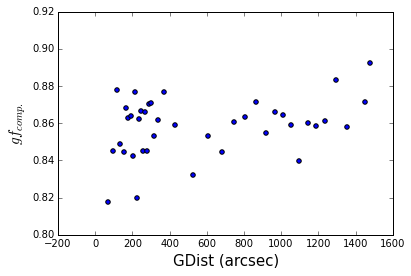

In [111]:
if (len(HST_Dist)>len(SSEX_Dist)):
    SSEX_Dist=np.insert(SSEX_Dist,len(SSEX_Dist),0)
if len(HST_Dist)<len(SSEX_Dist):
    HST_Dist=np.insert(HST_Dist,len(HST_Dist),0)
else:
    print 'has the right shape'

if (len(HST_Dist_i)>len(SSEX_Dist_i)):
    SSEX_Dist_i=np.insert(SSEX_Dist_i,len(SSEX_Dist_i),0)
if len(HST_Dist_i)<len(SSEX_Dist_i):
    HST_Dist_i=np.insert(HST_Dist_i,len(HST_Dist_i),0)
else:
    print 'has the right shape'

if (len(HST_Dist_r)>len(SSEX_Dist_r)):
    SSEX_Dist_r=np.insert(SSEX_Dist_r,len(SSEX_Dist_r),0)
if len(HST_Dist_r)<len(SSEX_Dist_r):
    HST_Dist_r=np.insert(HST_Dist_r,len(HST_Dist_r),0)
else:
    print 'has the right shape'

print '#### g ####'
print HST_Dist
print SSEX_Dist

completeness_frac_Dist=np.true_divide(SSEX_Dist+0.0001,HST_Dist+0.0001)

if len(Bins_Dist)<len(completeness_frac_Dist):
    Bins_Dist=np.insert(Bins_Dist,len(Bins_Dist),max(Bins_Dist)-Bins_Dist[1]+Bins_Dist[2])
if len(Bins_Dist)>len(completeness_frac_Dist):
    print 'help'
    
    
print '#### r ####'
print HST_Dist_r
print SSEX_Dist_r


completeness_frac_Dist_r=np.true_divide(SSEX_Dist_r+0.0001,HST_Dist_r+0.0001)
if len(Bins_Dist_r)<len(completeness_frac_Dist_r):
    Bins_Dist_r=np.insert(Bins_Dist_r,len(Bins_Dist_r),max(Bins_Dist_r)-Bins_Dist_r[1]+Bins_Dist_r[2])
if len(Bins_Dist_r)>len(completeness_frac_Dist_r):
    print 'help'

    
print '#### i ####'
print HST_Dist_i
print SSEX_Dist_i

 
completeness_frac_Dist_i=np.true_divide(SSEX_Dist_i+0.0001,HST_Dist_i+0.0001)
if len(Bins_Dist_i)<len(completeness_frac_Dist_i):
    Bins_Dist_i=np.insert(Bins_Dist_i,len(Bins_Dist_i),max(Bins_Dist_i)-Bins_Dist_i[1]+Bins_Dist_i[2])
if len(Bins_Dist_i)>len(completeness_frac_Dist_i):
    print 'help'




R_P_points= np.arange(80,max(Bins_Dist),50)
plt.figure()


plt.scatter(Bins_Dist[1:], completeness_frac_Dist[1:])
plt.xlabel('GDist (arcsec)', size=15)
plt.ylabel('$g f_{comp.}$', size=15)
#plt.xlim(0,500)
#plt.ylim(0.5,1)
#plt.plot(R_P_points, 1-Pritchet_f(R_P_points/50,0.005,1.3)-0.12)
plt.savefig(filename[:-5]+'_GDist_completenessG.png')



plt.show()